In [25]:
import numpy as np
import copy, math
import matplotlib.pyplot as plt

In [4]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

print(f"X_train = {X_train}")
print(f"y_train = {y_train}")
print(f"x.shape: {X_train.shape}")
print(f"y.shape: {y_train.shape}")

X_train = [[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y_train = [460 232 178]
x.shape: (3, 4)
y.shape: (3,)


$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$
notation:
- $\mathbf{x}^{(i)}$ is vector containing example i. $\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$
- $x^{(i)}_j$ is element j in example i. The superscript in parenthesis indicates the example number while the subscript represents an element.  

In [7]:
w = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])
b = 785.1811367994083

print(f"w: {w}")
print(f"b: {b}")

w: [  0.39133535  18.75376741 -53.36032453 -26.42131618]
b: 785.1811367994083


In [13]:
def model_prediction(X, y, w, b):
    m = X.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = np.dot(X[i], w) + b
    return f_wb

In [14]:
prediction = model_prediction(X_train, y_train, w, b)
print(f"Model Prediction: {prediction}")

Model Prediction: [459.99999762 231.99999837 177.99999899]


<a name="toc_15456_4"></a>
# Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


$\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

In [21]:
def cost_function(X, y, w, b):
    cost = 0
    m = X.shape[0]
    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        cost += (f_wb - y[i])**2
    cost = cost / (2*m)
    return cost

In [22]:
cost = cost_function(X_train, y_train, w, b)
print(cost)

1.5578904880036537e-12


<a name="toc_15456_5"></a>
# Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


In [30]:
def compute_gradient(X, y, w, b):
    m = X.shape[0]
    n = X.shape[1]
    dj_dw = np.zeros((n,))
    dj_db = 0.
    
    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_db, dj_dw

In [31]:
temp_dj_db, temp_dj_dw = compute_gradient(X_train, y_train, w, b)
print(f"dj_db: {temp_dj_db}")
print(f"dj_dw: {temp_dj_dw}")

dj_db: -0.24371454001903695
dj_dw: [-0.02243657 -5.50485945 15.44876247  0.89935153]


In [32]:
def gradient_descent(X, y, w_in, b_in, alpha, iters):
    w = copy.deepcopy(w_in)
    b = b_in
    J_history = []
    for i in range(iters):
        dj_db, dj_dw = compute_gradient(X, y, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        J_history.append(cost_function(X, y, w, b))
        if i % math.ceil(iters/10) == 0:
            print(f"Iteration {i} : Cost: {J_history[i]}")
    return w, b, J_history

In [34]:
w_in = np.zeros_like(w)
b_in = 0.
iters = 100000
alpha = 5.0e-7
w, b, J_history = gradient_descent(X_train, y_train, w_in, b_in, alpha, iters)
print(f"w_final: {w}")
print(f"b_final: {b}")
m = X_train.shape[0]
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w) + b:0.2f}, target value: {y_train[i]}")

Iteration 0 : Cost: 2529.4629522316304
Iteration 10000 : Cost: 624.8222593141535
Iteration 20000 : Cost: 594.3333440477821
Iteration 30000 : Cost: 581.0058048286588
Iteration 40000 : Cost: 574.732192894754
Iteration 50000 : Cost: 571.359101415084
Iteration 60000 : Cost: 569.179787645594
Iteration 70000 : Cost: 567.4929040444456
Iteration 80000 : Cost: 566.0102450017916
Iteration 90000 : Cost: 564.6133752247727
w_final: [ 0.24224154  0.28821169 -0.85520022 -1.57622854]
b_final: -0.04168501764938899
prediction: 439.29, target value: 460
prediction: 279.08, target value: 232
prediction: 150.90, target value: 178


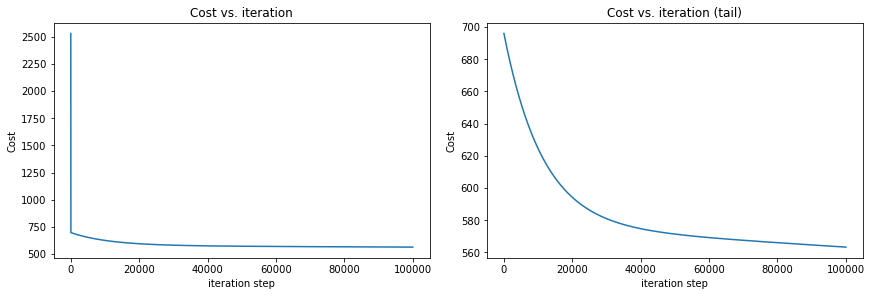

In [36]:
 fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_history)
ax2.plot(100 + np.arange(len(J_history[100:])), J_history[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()